In [1]:
from SCC_functions import *

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## years (time series index)
- create_years_array()

In [3]:
# start_year = 1750
# end_year = 3000
start_year = 2020
end_year = 3000

years = create_years_array(start_year, end_year)

In [4]:
## set perturbed year
SCC_year = 2020

In [5]:
## set temperature anomaly in start year
T_0 = 1.2

## consumption time series
- create_total_consumption()

In [6]:
W = create_total_consumption(years, W_fixed_year=2020, W_fixed=80)

In [7]:
d_W = {'years': years, 'W': W}

In [8]:
df_W = pd.DataFrame(data=d_W).set_index('years')

In [9]:
df_W.loc[2020]

W    80.0
Name: 2020, dtype: float64

Text(0, 0.5, 'W / $trillion')

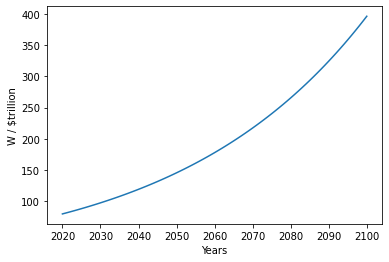

In [10]:
plt.plot(df_W.loc[2000:2100])
plt.xlabel("Years")
plt.ylabel("W / $trillion")

## discount function
- create_discount_function()

In [11]:
discount_function = create_discount_function(years, SCC_year)

In [12]:
d_discount_function = {'years': years, 'discount function': discount_function}

In [13]:
df_discount_function = pd.DataFrame(data=d_discount_function).set_index('years')

In [14]:
df_discount_function.loc[2020]

discount function    1.0
Name: 2020, dtype: float64

Text(0, 0.5, 'Discount Function')

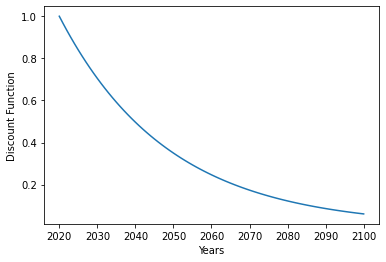

In [15]:
plt.plot(df_discount_function.loc[2000:2100])
plt.xlabel("Years")
plt.ylabel("Discount Function")

## temperature profile and perturbed temperature profile
- N.B. these can come from a geometric temperature profile or calculated from emissions through various methods

In [16]:
## set size of perturbation in GtCO2!!
## to reduce numerical error usually a larger perturbation than 1 tCO2 is used in the calculation of SCC
size_of_perturbation = 1  

### Default geometric temperature profile and when perturbed

- create_geometric_T() amd create_geometeric_T_perturbed()

In [17]:
## set TCRE and k_s 
## N.B. the T_TCRE should be given for a 1 GtCO2 perturbation
T_TCRE_1 = 0.00054 # for 1 GtCO2
k_s = 0.12

In [18]:
geometric_T = create_geometric_T(years, T_0=T_0, alpha=0.02, delta_T=3)

In [19]:
geometric_T_perturbed = create_geometric_T_perturbed(years, T=geometric_T, SCC_year=SCC_year, T_TCRE=T_TCRE_1*size_of_perturbation, k_s=k_s)

In [20]:
d_geometric_T = {'years': years, 'T': geometric_T, 'T_p': geometric_T_perturbed}

In [21]:
df_geometric_T = pd.DataFrame(data=d_geometric_T).set_index('years')

In [22]:
df_geometric_T.loc[2020]

T      1.2
T_p    1.2
Name: 2020, dtype: float64

Text(0, 0.5, '$T$')

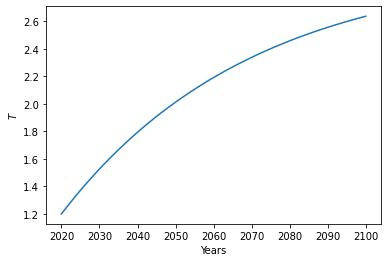

In [23]:
plt.plot(df_geometric_T.loc[2000:2100]['T'])
plt.xlabel("Years")
plt.ylabel("$T$")

Text(0, 0.5, '$T_p-T$')

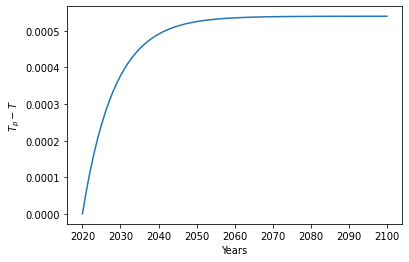

In [24]:
plt.plot(df_geometric_T.loc[2000:2100]['T_p']-df_geometric_T.loc[2000:2100]['T'])
plt.xlabel("Years")
plt.ylabel("$T_p-T$")

# calculate SCC

- SCC_calculator()

In [25]:
## define damage function values
gamma=2
D0=0.00267

create time series data frame

In [26]:
time_series_data = {'years': years, 'W': W, 'discount function': discount_function, 'T': geometric_T, 'T perturbed': geometric_T_perturbed}

time_series_df = pd.DataFrame(data=time_series_data).set_index('years')

In [27]:
time_series_df

,W,discount function,T,T perturbed
years,,,,
2020,8.000000e+01,1.000000e+00,1.200000,1.200000
2021,8.161611e+01,9.656054e-01,1.235642,1.235703
2022,8.326486e+01,9.323938e-01,1.270579,1.270694
2023,8.494692e+01,9.003245e-01,1.304824,1.304987
2024,8.666297e+01,8.693582e-01,1.338391,1.338596
...,...,...,...,...
2996,2.401697e+10,1.460496e-15,3.000000,3.000540
2997,2.450215e+10,1.410263e-15,3.000000,3.000540
2998,2.499712e+10,1.361758e-15,3.000000,3.000540


In [28]:
SCC_calculator(time_series_df, size_of_perturbation=size_of_perturbation, gamma=gamma, D0=D0)

31.826890094939316